# Create gempy model from paper to sandbox

In [ ]:
import os
#Run this cell only if you want to run gempy in cuda mode (requires cuda and a dedicated cpu).
#Initial compilation will take a bit longer but the model will run much faster 
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cuda"

In [1]:
import gempy as gp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

No module named 'osgeo'
Not subsurface compatibility available


WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


## Initialize the model

In [2]:
geo_model = gp.create_model('Complex Model')
geo_model = gp.init_data(geo_model, extent= [0, 4000, 0, 2775, 200, 1500], resolution=[30, 10, 30])

Active grids: ['regular']


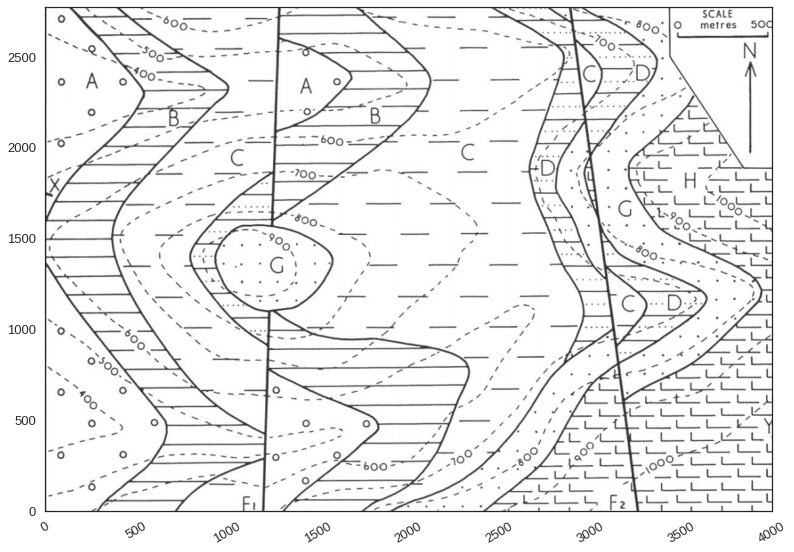

In [4]:
map_view = gp.plot.Plot2D(geo_model)
map_view.create_figure((15,8))
ax = map_view.add_section(direction='z')
# Reading image
img = mpimg.imread('geological_model.PNG')
# Plotting it inplace
ax.imshow(img, origin='upper', alpha=.8, extent = (0, 4000, 0,2775))



In [5]:
gp.set_interpolator(geo_model, theano_optimizer='fast_run', verbose=[])

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                         values
range              5038.911093
$C_o$            604538.690476
drift equations            [3]


In [6]:
geo_model.add_features(['Fault2','Cycle2','Fault1','Cycle1'])
geo_model.delete_features('Default series')

,order_series,BottomRelation,isActive,isFault,isFinite
Fault2,1,Erosion,False,False,False
Cycle2,2,Erosion,False,False,False
Fault1,3,Erosion,False,False,False
Cycle1,4,Erosion,False,False,False


In [7]:
geo_model.add_surfaces(['F2','H','G','F1','D','C','B', 'A'])

,surface,series,order_surfaces,color,id
0,F2,Cycle1,1,#015482,1
1,H,Cycle1,2,#9f0052,2
2,G,Cycle1,3,#ffbe00,3
3,F1,Cycle1,4,#728f02,4
4,D,Cycle1,5,#443988,5
5,C,Cycle1,6,#ff3f20,6
6,B,Cycle1,7,#5DA629,7
7,A,Cycle1,8,#4878d0,8


In [8]:
gp.map_stack_to_surfaces(geo_model, {'Fault1':'F1', 'Fault2':'F2', 'Cycle2':['G','H']})

,surface,series,order_surfaces,color,id
0,F2,Fault2,1,#015482,1
1,H,Cycle2,1,#9f0052,2
2,G,Cycle2,2,#ffbe00,3
3,F1,Fault1,1,#728f02,4
4,D,Cycle1,1,#443988,5
5,C,Cycle1,2,#ff3f20,6
6,B,Cycle1,3,#5DA629,7
7,A,Cycle1,4,#4878d0,8


In [9]:
geo_model.set_is_fault(['Fault1', 'Fault2'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Fault2,1,Fault,False,True,False
Cycle2,2,Erosion,False,False,False
Fault1,3,Fault,False,True,False
Cycle1,4,Erosion,False,False,False


In [10]:
###Cycle 1
#surface B - before F1
geo_model.add_surface_points(X=584, Y=285, Z=500, surface='B')
geo_model.add_surface_points(X=494, Y=696, Z=500, surface='B')
geo_model.add_surface_points(X=197, Y=1898, Z=500, surface='B')
geo_model.add_surface_points(X=473, Y=2180, Z=400, surface='B')
geo_model.add_surface_points(X=435, Y=2453, Z=400, surface='B')
#surface C - before F1
geo_model.add_surface_points(X=946, Y=188, Z=600, surface='C')
geo_model.add_surface_points(X=853, Y=661, Z=600, surface='C')
geo_model.add_surface_points(X=570, Y=1845, Z=600, surface='C')
geo_model.add_surface_points(X=832, Y=2132, Z=500, surface='C')
geo_model.add_surface_points(X=767, Y=2495, Z=500, surface='C')
#Surface D - Before F1
geo_model.add_surface_points(X=967, Y=1638, Z=800, surface='D')
geo_model.add_surface_points(X=1095, Y=996, Z=800, surface='D')
# Adding orientation to Cycle 1
geo_model.add_orientations(X=832, Y=2132, Z=500, surface='C', orientation = [76,17.88,1])
#surface B - After F1
geo_model.add_surface_points(X=1447, Y=2554, Z=500, surface='B')
geo_model.add_surface_points(X=1511, Y=2200, Z=500, surface='B')
geo_model.add_surface_points(X=1549, Y=629, Z=600, surface='B')
geo_model.add_surface_points(X=1630, Y=287, Z=600, surface='B')
#surface C - After F1
geo_model.add_surface_points(X=1891, Y=2063, Z=600, surface='C')
geo_model.add_surface_points(X=1605, Y=1846, Z=700, surface='C')
geo_model.add_surface_points(X=1306, Y=1641, Z=800, surface='C')
geo_model.add_surface_points(X=1476, Y=979, Z=800, surface='C')
geo_model.add_surface_points(X=1839, Y=962, Z=700, surface='C')
geo_model.add_surface_points(X=2185, Y=893, Z=600, surface='C')
geo_model.add_surface_points(X=2245, Y=547, Z=600, surface='C')
#Surface D - After F1
geo_model.add_surface_points(X=2809, Y=2567, Z=600, surface='D')
geo_model.add_surface_points(X=2843, Y=2448, Z=600, surface='D')
geo_model.add_surface_points(X=2873, Y=876, Z=700, surface='D')
# Surface D - After F2
geo_model.add_surface_points(X=3056, Y=2439, Z=650, surface='D')
geo_model.add_surface_points(X=3151, Y=1292, Z=700, surface='D')

### Fault 1
# Surface F1
geo_model.add_surface_points(X=1203, Y=138, Z=600, surface='F1')
geo_model.add_surface_points(X=1250, Y=1653, Z=800, surface='F1')
#orientation to Fault 1
geo_model.add_orientations(X=1280, Y=2525, Z=500, surface='F1', orientation = [272,90,1])

### Cycle 2
# Surface G - Before F2
geo_model.add_surface_points(X=1012, Y=1493, Z=900, surface='G')
geo_model.add_surface_points(X=1002, Y=1224, Z=900, surface='G')
geo_model.add_surface_points(X=1579, Y=1376, Z=850, surface='G')
geo_model.add_surface_points(X=2489, Y=336, Z=750, surface='G')
geo_model.add_surface_points(X=2814, Y=1848, Z=750, surface='G')
#Surface H - Before F2
geo_model.add_surface_points(X=2567, Y=129, Z=850, surface='H')
geo_model.add_surface_points(X=3012, Y=726, Z=800, surface='H')
#Orientation to cycle 2
geo_model.add_orientations(X=1996, Y=47, Z=800, surface='G', orientation = [92,5.54,1])
#Surface G - After F2
geo_model.add_surface_points(X=3031, Y=2725, Z=800, surface='G')
geo_model.add_surface_points(X=3281, Y=2314, Z=750, surface='G')
geo_model.add_surface_points(X=3311, Y=1357, Z=750, surface='G')
geo_model.add_surface_points(X=3336, Y=898, Z=750, surface='G')
#Surface H - After F2
geo_model.add_surface_points(X=3218, Y=1818, Z=890, surface='H')
geo_model.add_surface_points(X=3934, Y=1207, Z=810, surface='H')
geo_model.add_surface_points(X=3336, Y=704, Z=850, surface='H')

### Fault 2
geo_model.add_surface_points(X=3232, Y=178, Z=1000, surface='F2')
geo_model.add_surface_points(X=2912, Y=2653, Z=700, surface='F2')
#Add orientation to Fault 2
geo_model.add_orientations(X=3132, Y=951, Z=700, surface='F2', orientation = [85,90,1])




,X,Y,Z,G_x,G_y,G_z,smooth,surface
3,3132.0,951.0,700.0,0.996195,0.087156,1.000061e-12,0.01,F2
2,1996.0,47.0,800.0,0.096482,-0.003369,9.953290e-01,0.01,G
1,1280.0,2525.0,500.0,-0.999391,0.034899,1.000061e-12,0.01,F1
0,832.0,2132.0,500.0,0.297904,0.074276,9.517016e-01,0.01,C


In [11]:
gp.compute_model(geo_model, sort_surfaces=False)


Lithology ids 
  [8. 8. 8. ... 2. 2. 2.] 

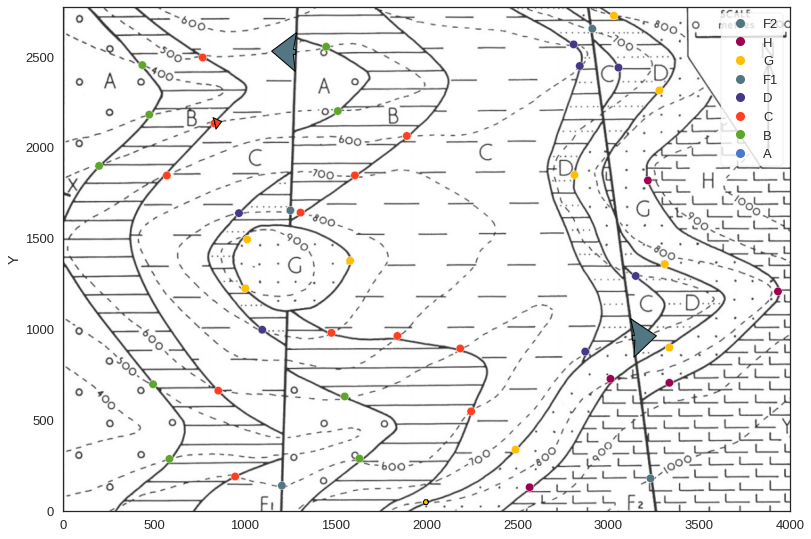

In [12]:
map_view.remove(ax)
map_view.plot_data(ax, direction='z', cell_number=5, legend ='force')
ax.figure

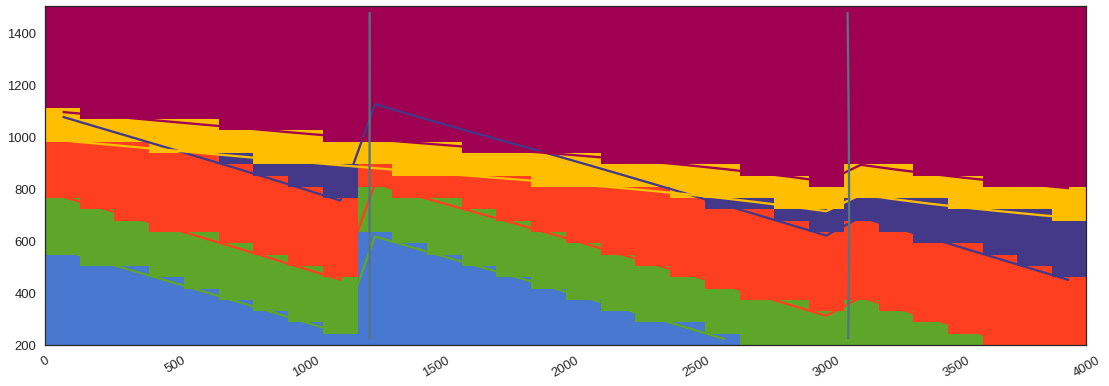

In [13]:
profile_view = gp.plot.Plot2D(geo_model)
profile_view.create_figure((15, 8))
ax2 = profile_view.add_section(direction='y')
#Cross-section of the model
ax2.set_xlim(geo_model.grid.regular_grid.extent[0], geo_model.grid.regular_grid.extent[1])
ax2.set_ylim(geo_model.grid.regular_grid.extent[4], geo_model.grid.regular_grid.extent[5])

profile_view.remove(ax2)
profile_view.plot_lith(ax2, cell_number=5, legend ='force')
profile_view.plot_contacts(ax2, cell_number=5)
#ax2.figure

/home/daniel/anaconda3/envs/sandbox-env/lib/python3.7/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


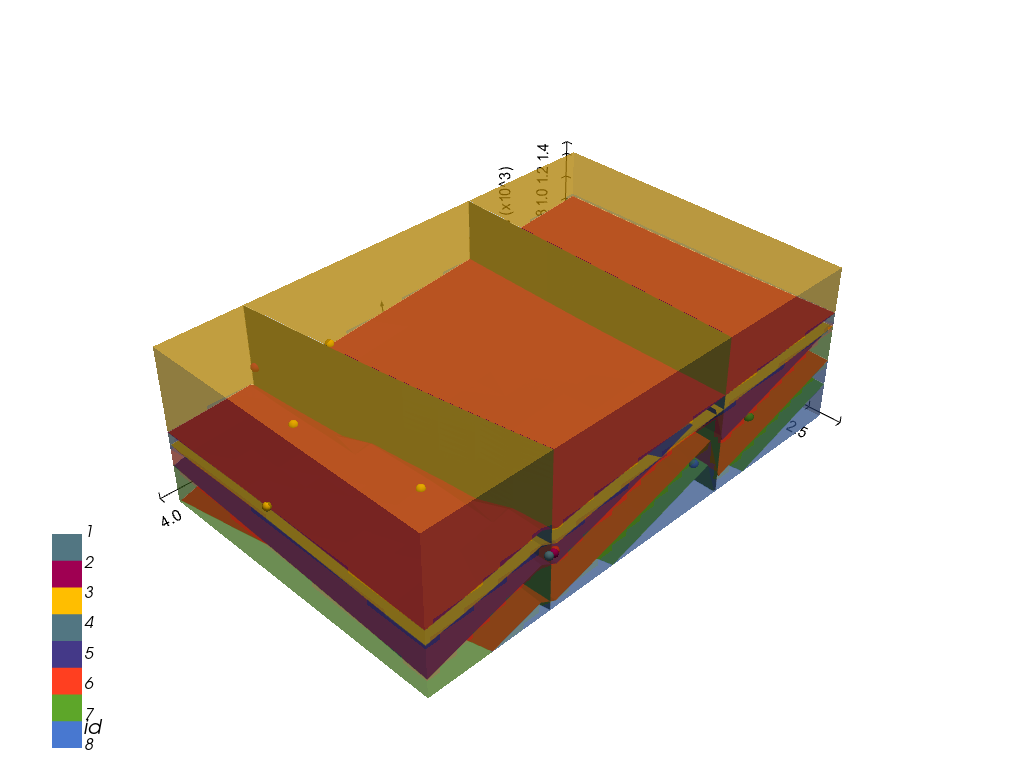

[StructuredGrid (0x7f7e1ee9fbb0)
   N Cells:	7569
   N Points:	9000
   X Bounds:	6.667e+01, 3.933e+03
   Y Bounds:	1.388e+02, 2.636e+03
   Z Bounds:	2.217e+02, 1.478e+03
   Dimensions:	30, 10, 30
   N Arrays:	5,

In [14]:
# Plot 2D
map_view.remove(ax)
map_view.plot_data(ax, direction='z', cell_number=5, legend ='force')

profile_view.remove(ax2)
profile_view.plot_lith(ax2, cell_number=5, legend ='force')

#Plot 3D
view_3D = gp.plot_3d(geo_model, plotter_type="basic", notebook= True )
view_3D.plot_data()
view_3D.plot_surfaces()
view_3D.plot_structured_grid(opacity=.2)

## Initialize Sensor and Projector

In [15]:
#save the paths to the calibration files 
from sandbox import _calibration_dir
_calibprojector = _calibration_dir + "my_projector_calibration.json"
_calibsensor = _calibration_dir + "my_sensor_calibration.json"

In [17]:
#Import Sensor
from sandbox.sensor import Sensor
sensor = Sensor(calibsensor=_calibsensor, name="dummy")

sandbox.sensor.sensor_api: INFO | JSON configuration loaded for sensor.
sandbox.sensor.dummy: INFO | DummySensor initialized.


In [18]:
# Import projector
from sandbox.projector import Projector
projector = Projector(calibprojector=_calibprojector)


sandbox.projector.projector: INFO | JSON configuration loaded for projector


Launching server at http://localhost:45487
sandbox.projector.projector: INFO | Projector initialized and server started.
Please position the browser window accordingly and enter fullscreen!


## Initialize marker detection

In [19]:
#Initialize the aruco detection
from sandbox.markers import MarkerDetection
aruco = MarkerDetection(sensor=sensor)

sandbox.markers.aruco: INFO | Using dummy arucos. Create your own aruco positions using .set_aruco_position() function
sandbox.markers.aruco: INFO | using dummy aruco module
sandbox.markers.aruco: INFO | Aruco module loaded
sandbox.markers.markers_plotting: INFO | Aruco detection ready


## Initialize main thread for live update

In [20]:
from sandbox.main_thread import MainThread
main = MainThread(sensor=sensor, projector=projector, aruco=aruco)

sandbox.projector.contourlines: INFO | ContourLinesModule loaded successfully
sandbox.projector.shading: INFO | LightSource set to address RWTH Aachen, Germany at datetime Mon Dec 13 22:28:54 2021
sandbox.projector.cmap: INFO | CmapModule loaded successfully


In [21]:
# Start the thread 
main.run()

sandbox.main_thread: INFO | Thread started or resumed...


In [22]:
main.widget_plot_module()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] Column
                [0] Column
                    [0] Markdown(str)
                    [1] Checkbox(name='Show colormap', value=True)
                    [2] Select(name='Choose a colormap', options=['gist_earth', ...], value='gist_earth')
                    [3] Column
                        [0] Markdown(str)
                        [1] Checkbox(name='Show relief shading', value=True)
                        [2] Tabs
                            [0] WidgetBox
                                [0] Checkbox(name='Manual configuration')
                                [1] FloatSlider(end=360.0, name='Azimuth', value=330.9937486427058)
                                [2] FloatSlider(end=90.0, name='Altitude', value=-59.973871342016885)
                                [3] FloatInput(name='Vertical Exageration', step=0.01, value=0.25)
                            [1] WidgetBox
                                [0] TextInput(name='Enter address (e.g. City,..., value='RWTH Aachen, Germany')
                                [1] DatePicker(name='Select date (UTC +0)', value=datetime.date(2021, ...)
                                [2] Row(width_policy='min')
                                    [0] IntSlider(end=23, name='Hour', value=22, width_policy='min')
                                    [1] IntSlider(end=59, name='Minute', value=28, width_policy='min')
                                    [2] IntSlider(end=59, name='Second', value=54, width_policy='min')
                                [3] Markdown(str, sizing_mode='scale_width')
                                [4] Markdown(str, sizing_mode='scale_width')
                                [5] Markdown(str, sizing_mode='scale_width')
                                [6] Markdown(str, sizing_mode='scale_width')
                            [2] WidgetBox
                                [0] Checkbox(name='Start day simulation i...)
                [1] Column
                    [0] Markdown(str)
                    [1] Checkbox(name='Active contours', value=True)
                    [2] Checkbox(name='Automatic levels f...)
                    [3] Markdown(str)
                    [4] WidgetBox
                        [0] Checkbox(name='Show major contours', value=True)
                        [1] IntInput(name='Choose a contour step', value=100)
                        [2] Checkbox(name='Show minor contours', value=True)
                        [3] IntInput(name='Choose a minor c..., value=50)
                        [4] Checkbox(name='Show contours label', value=True)
                        [5] IntInput(name='set a contour l..., value=15)
            [1] Column
                [0] Column
                    [0] Markdown(str)
                    [1] Checkbox(name='Aruco Detection', value=True)
                    [2] Column
                        [0] Markdown(str)
                        [1] Row
                            [0] WidgetBox
                                [0] Checkbox(name='Show aruco location', value=True)
                                [1] Checkbox(name='Show aruco id', value=True)
                                [2] Checkbox(name='Show line connecting a...)
                                [3] ColorPicker(name='Color', value='#ff0000')
                            [1] WidgetBox
                                [0] Markdown(str)
                                [1] Row
                                    [0] IntInput(name='id', value=1, width=70)
                                    [1] IntInput(name='x coordinate', value=50, width=70)
                                    [2] IntInput(name='y coordinate', value=50, width=70)
                                [2] Button(button_type='success', name='Add dummy aruco dict')
                                [3] Button(button_type='warning', name='Clear aruco dict')
                [1] Column
                    [0] Markdown(str)
                    [1] RadioB

## Initialize the gempy module 

In [23]:
main.stop()
from sandbox.modules.gempy import GemPyModule
gpsb= GemPyModule(geo_model = geo_model, 
                  extent = sensor.extent, 
                  box=sensor.physical_dimensions, 
                  load_examples = False,
                 )

scale in Model units/ mm (X,Y,Z): [4.0, 3.4687499999999996, 4.0625]
the shown extent is [0.0, 4000.0, 0.0, 2775.0] 
Active grids: ['regular' 'topography' 'sections']
sandbox.modules.gempy.gempy_module: INFO | GemPyModule loaded successfully


## Add the module to the main thread

In [24]:
main.add_module(name='gempy', module=gpsb)
main.run()

sandbox.main_thread: INFO | module gempy added to modules


In [ ]:
gpsb.show_hillshades = True
gpsb.show_lith = True
gpsb.show_boundary = True
gpsb.show_contour = False
gpsb.show_only_faults = False
gpsb.show_fill_contour = False


In [25]:
#Stop Thread







main.stop()

sandbox.main_thread: INFO | Thread stopped.
